#Matplotlib

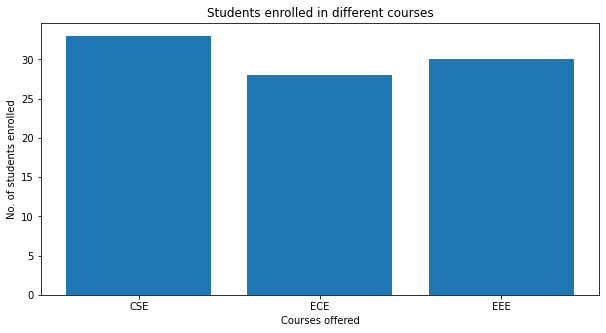

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'CSE':33, 'ECE':28, 'EEE':30}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values)
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

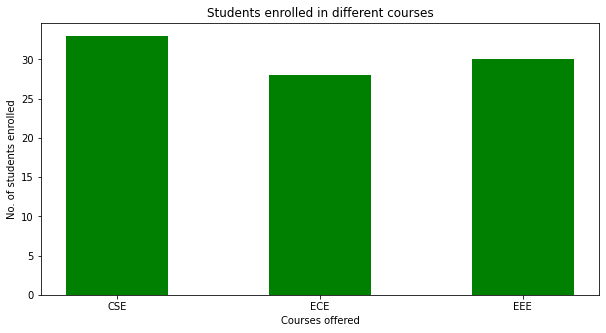

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'CSE':33, 'ECE':28, 'EEE':30}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='green',
        width = 0.5)
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

##Multiple charts

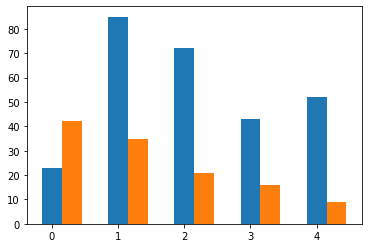

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = [23,85, 72, 43, 52]
data2 = [42, 35, 21, 16, 9]
width =0.3
plt.bar(np.arange(len(data1)), data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width)
plt.show()

##Stack charts

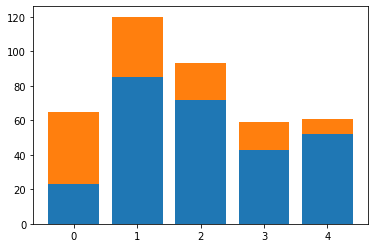

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = [23,85, 72, 43, 52]
data2 = [42, 35, 21, 16, 9]
plt.bar(range(len(data1)), data1)
plt.bar(range(len(data2)), data2, bottom=data1)
plt.show()

##Pareto Chart

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Build data frame
df = pd.DataFrame({"error": [92, 83, 76, 59, 53, 27, 16, 9, 7, 4, 3, 1]})

# Reset the indexes
df.index = ["Dose missed", "Wrong time", "Wrong drug", "Over dose", "Wrong patient", "Wrong route", "Wrong calculation", "Duplicated drugs", "Under dose", "Wrong IV rate", "Technique error", "Unauthorized drug"]

# Sort values in descending order
df = df.sort_values(by='error', ascending=False)

# Add cumulative percentage column
df["cum_percentage"] = round(df["error"].cumsum()/df["error"].sum()*100,2)

# Display data frame
df

,error,cum_percentage
Dose missed,92,21.40
Wrong time,83,40.70
Wrong drug,76,58.37
Over dose,59,72.09
Wrong patient,53,84.42
Wrong route,27,90.70
Wrong calculation,16,94.42
Duplicated drugs,9,96.51
Under dose,7,98.14
Wrong IV rate,4,99.07


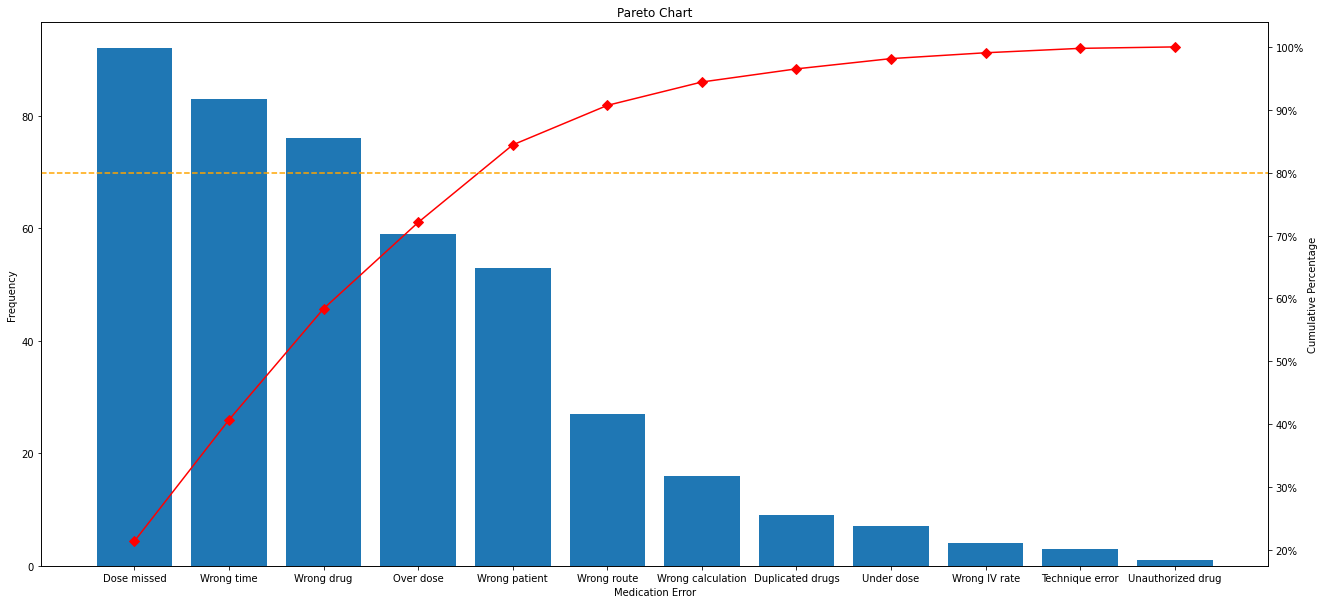

In [6]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(df.index, df["error"])
ax.set_title("Pareto Chart")
ax.set_xlabel("Medication Error")
ax.set_ylabel("Frequency");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(df.index, df["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

#Sea Born

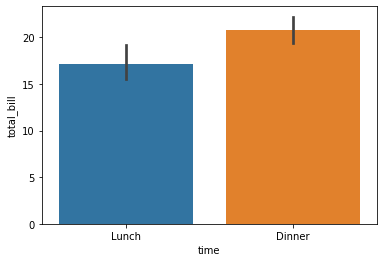

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.barplot(x = 'time',y = 'total_bill',data = df)
plt.show()

##Multiple Bars

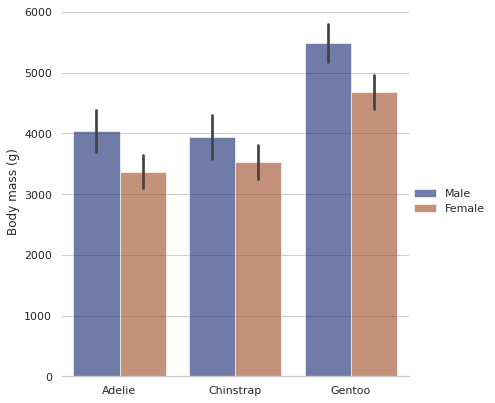

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

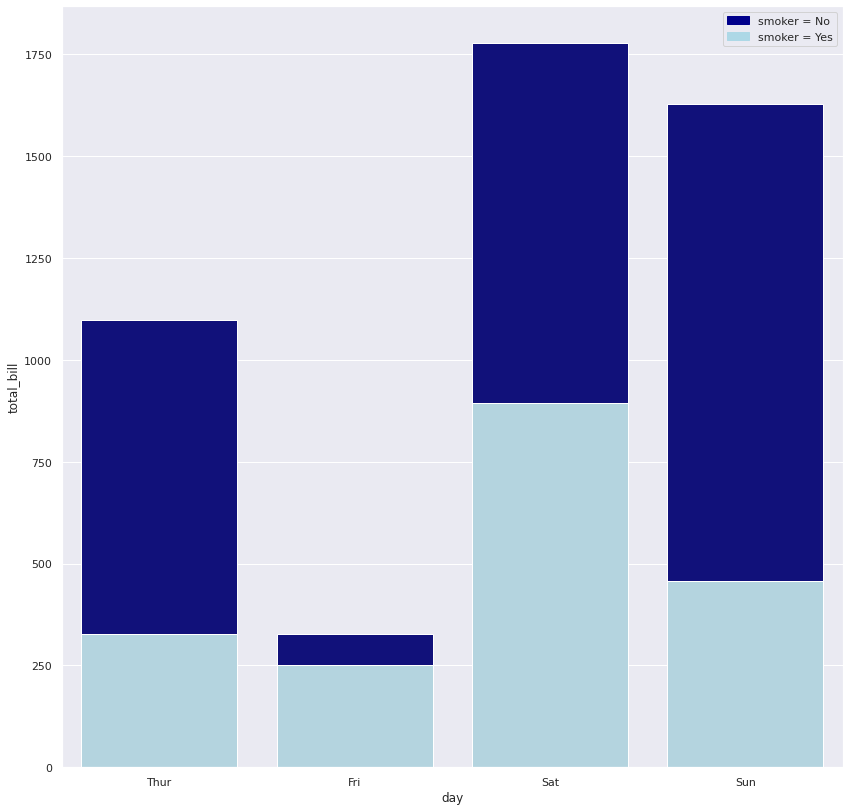

In [9]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = tips.groupby('day')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

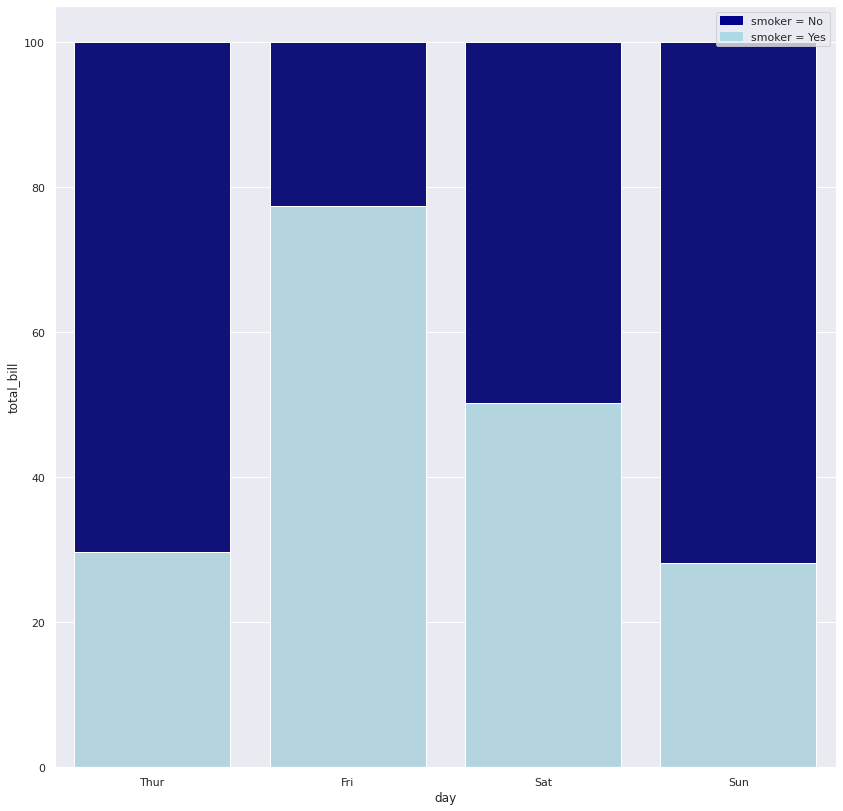

In [16]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()